# UJUNWA CYNTHIA OKPARA ( student ID: 2291881 )

In [1]:
#Let's import all the needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Let's import the dataset
df_train=pd.read_csv('Paitients_Files_Train.csv')

## Exploratory Data Analysis

In [3]:
# Let's try to view the headings in other to understand the data
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [4]:
# Let's analyse the dataset for its stucture, size, memory usage, contents and missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [5]:
#Let's try to view the dimensions (number of rows and columns) in the dataframe
df_train.shape

(599, 11)

array([[<Axes: title={'center': 'PRG'}>, <Axes: title={'center': 'PL'}>,
        <Axes: title={'center': 'PR'}>],
       [<Axes: title={'center': 'SK'}>, <Axes: title={'center': 'TS'}>,
        <Axes: title={'center': 'M11'}>],
       [<Axes: title={'center': 'BD2'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Insurance'}>]], dtype=object)

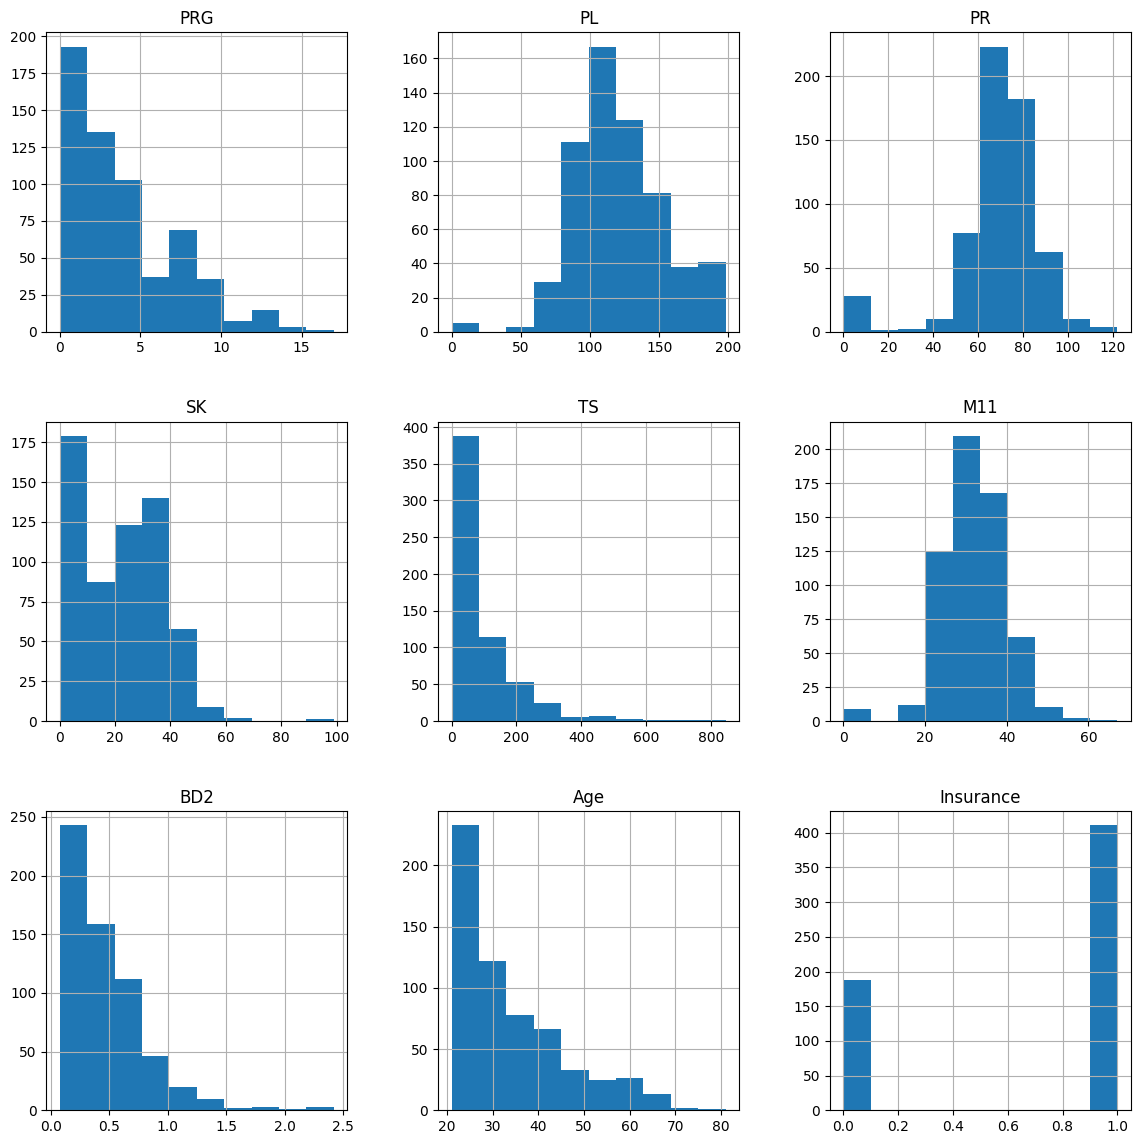

In [6]:
# see how the data is distributed.
df_train.hist(figsize = (14,14))

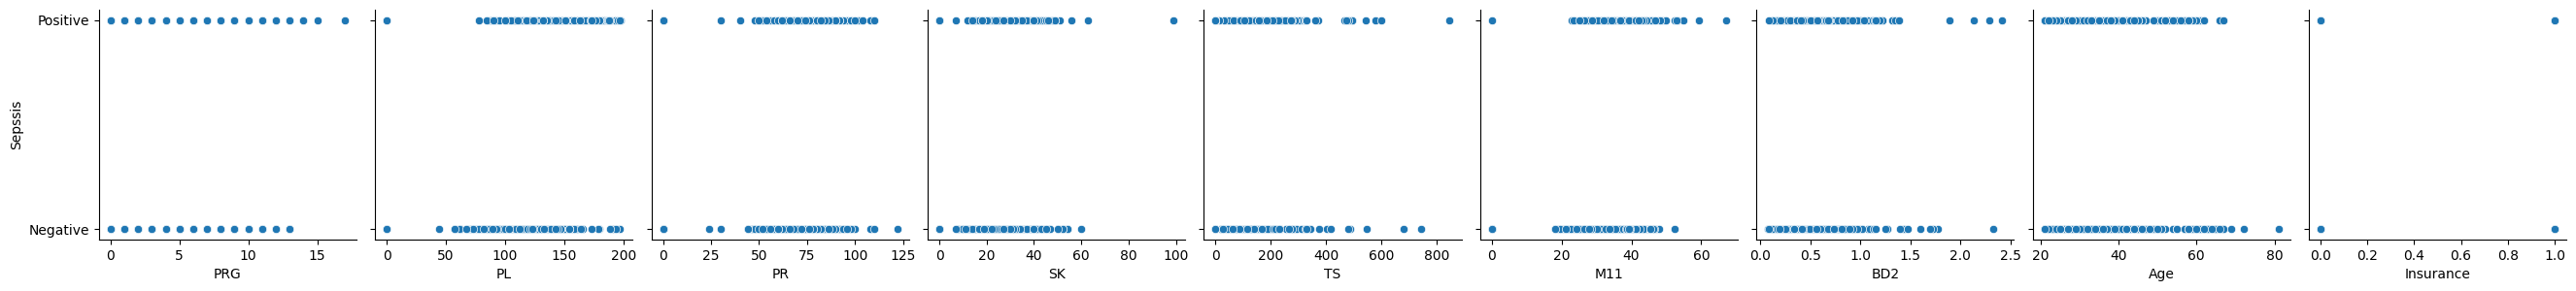

In [7]:
# Let's see how Outcome are related with other variables using scatter plot.
sns.pairplot(df_train, x_vars=['PRG', 'PL', 'PR','SK','TS','M11', 'BD2','Age', 'Insurance'], y_vars='Sepssis', 
             height=3, aspect=1, kind='scatter')
plt.show()

## DATA PREPROCESSING

In [8]:
df_train['sepsis_encoded'] = df_train['Sepssis'].map({'Positive':1, 'Negative': 0})
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,sepsis_encoded
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,1
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,0
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,1
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,0
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,1


In [9]:
df_train = df_train.drop(['ID', 'Insurance', 'Sepssis'], axis='columns')
df_train.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,sepsis_encoded
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# From here, We can see the statistical summary of the dataframe
df_train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,sepsis_encoded
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.347245
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.476492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# NaN values of 0 for Glucose, Blood Pressure, Skin Thickness, Insulin, BMI
# We can write Nan instead of 0
cols = ['PRG', 'PL', 'PR','SK','TS','M11', 'BD2','Age']
for col in cols:
    df_train[col].replace(0,np.NaN,inplace=True)
# find missing values
df_train.isnull().sum()

PRG                93
PL                  5
PR                 28
SK                175
TS                289
M11                 9
BD2                 0
Age                 0
sepsis_encoded      0
dtype: int64

In [12]:
# We can fill in NaN values with a median according to the target
for col in df_train.columns:
    df_train.loc[(df_train["sepsis_encoded"]==0) & (df_train[col].isnull()),col] = df_train[df_train["sepsis_encoded"]==0][col].mean()
    df_train.loc[(df_train["sepsis_encoded"]==1) & (df_train[col].isnull()),col] = df_train[df_train["sepsis_encoded"]==1][col].mean()

In [13]:
df_train.isnull().sum()

PRG               0
PL                0
PR                0
SK                0
TS                0
M11               0
BD2               0
Age               0
sepsis_encoded    0
dtype: int64

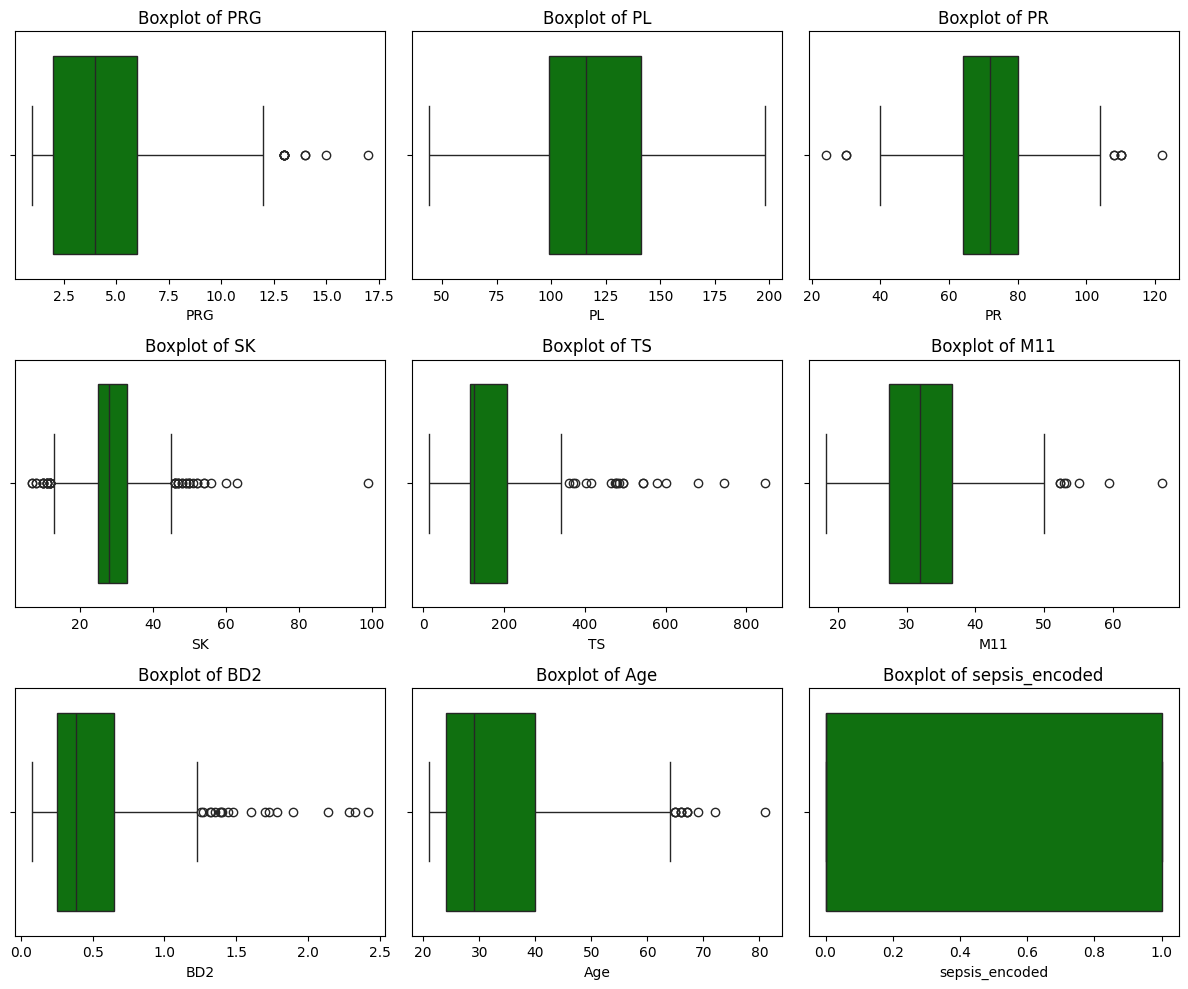

In [14]:
# Lets visualize the dataset to see if ther are presence of  outliers
# Setting up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot boxplots for each variable
for i, col in enumerate(df_train.columns):
    sns.boxplot(x=df_train[col], ax=axes[i],color='green')
    axes[i].set_title(f'Boxplot of {col}')

# Adjusting layout
plt.tight_layout()
plt.show()

In [15]:
# creating threshold for outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [16]:
# Checking for outliers
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")

In [17]:
# Printing the outliers
for col in df_train.columns:
    has_outliers(df_train, col)

SK yes
TS yes
BD2 yes


In [18]:
# validating the threshold
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [19]:
replace_with_thresholds(df_train, df_train.columns)

In [20]:
for col in df_train.columns:
    has_outliers(df_train, col)

In [21]:
df_train.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
PRG,599.0,4.530126,2.953995,1.000,1.0000,2.000,4.000000,6.000000,9.0000,10.0000,13.000,17.0000
PL,599.0,121.178910,30.796232,44.000,79.0000,99.000,116.000000,141.000000,166.0000,181.0000,196.000,198.0000
PR,599.0,72.128932,11.919148,24.000,52.0000,64.000,72.000000,80.000000,88.0000,90.0000,104.080,122.0000
SK,599.0,29.109589,8.916195,7.000,14.0000,25.000,28.000000,33.014286,40.0000,44.0000,52.040,74.5000
TS,599.0,151.865380,78.164592,14.000,49.9000,115.000,126.681159,207.514563,215.0000,293.7000,441.500,441.5000
M11,599.0,32.389473,6.972689,18.200,21.9000,27.400,32.000000,36.550000,42.0200,45.0200,52.300,67.1000
BD2,599.0,0.478889,0.326061,0.078,0.1418,0.248,0.383000,0.647000,0.8832,1.1279,1.732,1.9494
Age,599.0,33.290484,11.828446,21.000,21.0000,24.000,29.000000,40.000000,51.2000,58.1000,66.020,81.0000
sepsis_encoded,599.0,0.347245,0.476492,0.000,0.0000,0.000,0.000000,1.000000,1.0000,1.0000,1.000,1.0000


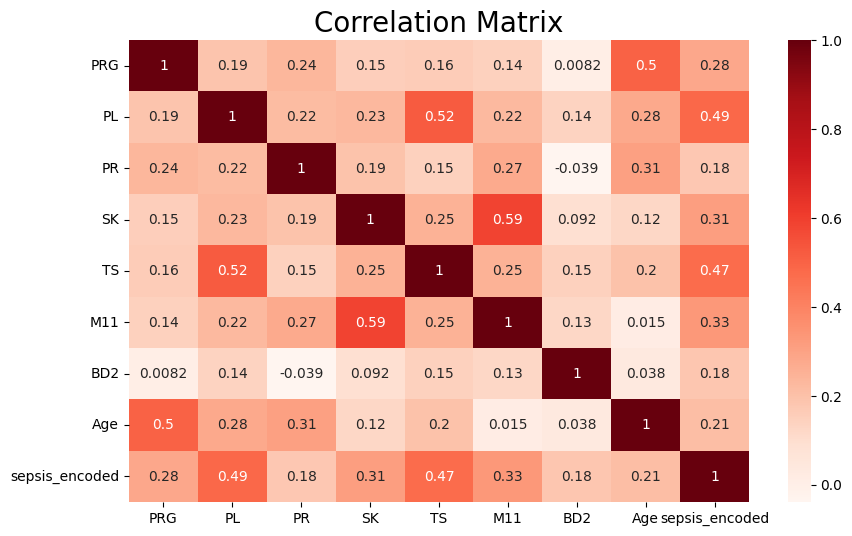

In [22]:
# lets try to view the relationships between variables in the dataset
plt.figure(figsize = (10,6))
sns.heatmap(df_train.corr(), annot = True, cmap = "Reds")
plt.title("Correlation Matrix", fontsize = 20);

In [23]:
# let's sort the correlation in ascending order
pd.DataFrame(df_train.corr()["sepsis_encoded"].sort_values(ascending = False)[1:])

,sepsis_encoded
PL,0.485244
TS,0.474737
M11,0.331559
SK,0.310035
PRG,0.284149
Age,0.210234
BD2,0.182376
PR,0.178347


In [24]:
# Target variable categorical
df_train.sepsis_encoded.unique()

array([1., 0.])

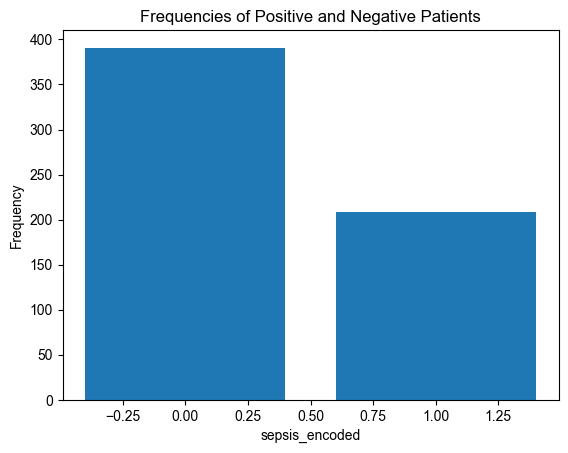

In [25]:
# counting the number of positive and negative patients
counts = df_train['sepsis_encoded'].value_counts()

# plot the frequencies using a bar chart
plt.bar(counts.index, counts.values)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (9, 5)
# add labels and title
plt.xlabel('sepsis_encoded')
plt.ylabel('Frequency')
plt.title('Frequencies of Positive and Negative Patients')

# show the plot
plt.show()

sepsis_encoded
0.0    391
1.0    208
Name: count, dtype: int64


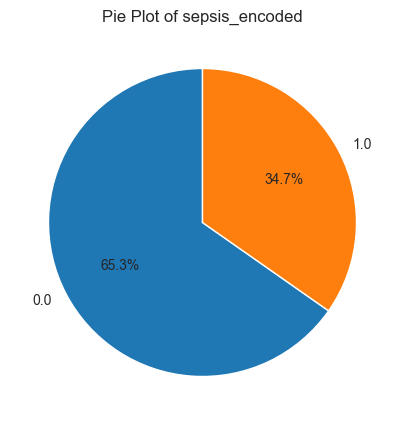

In [26]:
#Group by 'outcome' and get the frequency
type_frequency = df_train['sepsis_encoded'].value_counts()

# Display the frequency of each type
print(type_frequency)

# Plot a pie chart
type_frequency.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Plot of sepsis_encoded')
plt.ylabel('')  # Remove the default ylabel
plt.show()

In [27]:
# Feature selection
x = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

In [28]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [29]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
x_train_scaled = scaler.fit_transform(x_train)

# Transform the testing set (using the same scaler)
x_test_scaled = scaler.transform(x_test)

# Comparing ML Models

In [30]:
models = [('log', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
        ('GB', GradientBoostingClassifier()),
          ('SVR', SVC(gamma='auto')),
          ('ANN', MLPClassifier())
         ]

# evaluate each model in turn
results = []
names = []
# predicting and displaying accuracy and cross validation scores
for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


log: 0.839229 (0.044793)
KNN: 0.830851 (0.033123)
CART: 0.855940 (0.037817)
RF: 0.887278 (0.019009)
GB: 0.910195 (0.028151)
SVR: 0.864317 (0.032534)
ANN: 0.837234 (0.027287)


# Model Tuning

Let's see if we can optimize it performance

In [31]:
# Define hyperparameters and search space
log_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
# define the logistic regression model
log = LogisticRegression()

# Perform grid search with cross-validation
log_cv_model = GridSearchCV(estimator=log, param_grid=log_params, cv=10, scoring='accuracy')
#Fitting the model on the training data
log_cv_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [32]:
# Gettting best hyperparameters
best_params=log_cv_model.best_params_
best_params

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [33]:
# Train final model with best hyperparameters
log_tuned = LogisticRegression(**best_params, random_state=46)
# Fit the model to the training data
log_cv_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [34]:
# Predict on the test set with k-Nearest Neighbor
y_pred_log = log_cv_model.predict(x_test_scaled)

# Print the predictions
# np.concatenate((y_pred_log.reshape(len(y_pred_log), 1), y_test.reshape(len(y_test), 1)), 1)

In [35]:
# k-Nearest Neighbor:
KNN = KNeighborsClassifier()

# Define the parameters to tune
KNN_params = {
    "n_neighbors": [3, 5, 7],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2],  # Minkowski distance power parameter
}

# Perform grid search cross-validation
KNN_cv_model = GridSearchCV(KNN,
                            KNN_params,
                            cv=10,
                            n_jobs=-1,
                            verbose=2)

# Fit the grid search model
KNN_cv_model.fit(x_train_scaled, y_train)

# Print the best parameters found
print("Best parameters:", KNN_cv_model.best_params_)

# Final Model using the best parameters
KNN_tuned = KNN_cv_model.best_estimator_
KNN_tuned

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


KNeighborsClassifier(n_neighbors=7, p=1)

In [36]:
# Fit the tuned model to the training data
KNN_tuned.fit(x_train_scaled, y_train)

# Predict on the test set with k-Nearest Neighbor
y_pred_KNN = KNN_tuned.predict(x_test_scaled)

# Print the predictions
# np.concatenate((y_pred_KNN.reshape(len(y_pred_KNN), 1), y_test.reshape(len(y_test), 1)), 1)

In [37]:
# Decision Tree Classifier:
CART = DecisionTreeClassifier()
# Model Tuning
CART_params = {
    "max_features": [3, 5, 7],
    "min_samples_split": [2, 5, 10, 30],
    "max_depth": [3, 5, 8, None]
}
CART_cv_model = GridSearchCV(
    CART,
    CART_params,
    cv=10,
    n_jobs=-1,
    verbose=2
).fit(x_train_scaled, y_train)
CART_cv_model.best_params_
# Final Model
CART_tuned = DecisionTreeClassifier(**CART_cv_model.best_params_).fit(x_train_scaled, y_train)
# Fit the tuned model to the training data
CART_tuned.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


DecisionTreeClassifier(max_depth=3, max_features=7, min_samples_split=5)

In [38]:
# Predict on the test set with Decision Tree
y_pred_CART = CART_tuned.predict(x_test_scaled)

# Print the predictions
# np.concatenate((y_pred_CART.reshape(len(y_pred_CART), 1), y_test.reshape(len(y_test), 1)), 1)

In [39]:
# Random Forests:
RF = RandomForestClassifier()
# Model Tuning
RF_params = {
    "n_estimators": [100, 200, 500],
    "max_features": [3, 5, 7],
    "min_samples_split": [2, 5, 10, 30],
    "max_depth": [3, 5, 8, None]
}
RF_cv_model = GridSearchCV(
    RF,
    RF_params,
    cv=5,
    n_jobs=-1,
    verbose=2
).fit(x_train_scaled, y_train)
RF_cv_model.best_params_
# Final Model
RF_tuned = RandomForestClassifier(**RF_cv_model.best_params_).fit(x_train_scaled, y_train)
# Fit the tuned model to the training data
RF_tuned.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


RandomForestClassifier(max_depth=8, max_features=5, min_samples_split=5)

In [40]:
# Predict on the test set with Random Forest
y_pred_RF = RF_tuned.predict(x_test_scaled)

# Print the predictions
# np.concatenate((y_pred_RF.reshape(len(y_pred_RF), 1), y_test.reshape(len(y_test), 1)), 1)

In [41]:
# Gradient boosting
GB = GradientBoostingClassifier()
GB_params = GridSearchCV(GradientBoostingClassifier(), {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.05, 0.1, 0.5],
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['friedman_mse', 'squared_error'],
    'max_features': ['auto', 'sqrt', 'log2', None]
})
GB_params.fit(x_train_scaled, y_train)
print('Optimizing complete')

Optimizing complete


In [42]:
df_GB_params = pd.DataFrame(GB_params.cv_results_).dropna()
df_GB_params[['param_loss', 'param_learning_rate', 'param_n_estimators', 'param_criterion', 'param_max_features', 'mean_test_score']]

,param_loss,param_learning_rate,param_n_estimators,param_criterion,param_max_features,mean_test_score
20,exponential,0.05,50,friedman_mse,sqrt,0.885154
21,exponential,0.05,100,friedman_mse,sqrt,0.880987
22,exponential,0.05,150,friedman_mse,sqrt,0.891404
23,exponential,0.05,200,friedman_mse,sqrt,0.903969
24,exponential,0.05,50,friedman_mse,log2,0.891425
25,exponential,0.05,100,friedman_mse,log2,0.895614
26,exponential,0.05,150,friedman_mse,log2,0.908158
27,exponential,0.05,200,friedman_mse,log2,0.903925
52,exponential,0.1,50,friedman_mse,sqrt,0.895592
53,exponential,0.1,100,friedman_mse,sqrt,0.897697


In [43]:
GB_params.best_params_, GB_params.best_score_

({'criterion': 'friedman_mse',
  'learning_rate': 0.5,
  'loss': 'exponential',
  'max_features': None,
  'n_estimators': 50},
 0.9101973684210526)

In [44]:
best_params = GB_params.best_params_

In [45]:
# Final Model
GB_tuned = GradientBoostingClassifier(criterion=best_params['criterion'], 
                                         learning_rate=best_params['learning_rate'], loss=best_params['loss'], 
                                         max_features=best_params['max_features'], n_estimators=best_params['n_estimators'])

In [46]:
GB_tuned.fit(x_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.5, loss='exponential',
                           n_estimators=50)

In [47]:
# Predict on the test set with Gradient Boosting
y_pred_GB = GB_tuned.predict(x_test_scaled)
# Print the predictions
# np.concatenate((y_pred_GB.reshape(len(y_pred_GB), 1), y_test.reshape(len(y_test), 1)), 1)

In [48]:
# Support Vector Machine:
SVR = SVC()
# Model Tuning
SVR_params = {
    "C": [0.1, 1, 10, 100],  # Regularization parameter
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    "gamma": ['scale', 'auto'],  # Kernel coefficient
}
SVR_cv_model = GridSearchCV(
    SVR,
    SVR_params,
    cv=10,
    n_jobs=-1,
    verbose=2
).fit(x_train_scaled, y_train)
SVR_cv_model.best_params_
# Final Model
SVR_tuned = SVC(**SVR_cv_model.best_params_).fit(x_train_scaled, y_train)

# Fit the tuned model to the training data
SVR_tuned.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


SVC(C=10, kernel='linear')

In [49]:
# Predict on the test set with Support Vector Machine
y_pred_SVR = SVR_tuned.predict(x_test_scaled)

# Print the predictions
# np.concatenate((y_pred_SVR.reshape(len(y_pred_SVR), 1), y_test.reshape(len(y_test), 1)), 1)

In [50]:
# Artificial Neural Network:
ANN = MLPClassifier()
# Model Tuning
ANN_params = {
    "hidden_layer_sizes": [(100,), (50, 50), (20, 20, 20)],
    "activation": ['logistic', 'tanh', 'relu'],
    "solver": ['adam', 'sgd'],
    "learning_rate": ['constant', 'adaptive'],
    "max_iter": [100, 200, 500],
}
ANN_cv_model = GridSearchCV(
    ANN,
    ANN_params,
    cv=4,
    n_jobs=-1,
    verbose=2
).fit(x_train_scaled, y_train)
ANN_cv_model.best_params_
# Final Model
ANN_tuned = MLPClassifier(**ANN_cv_model.best_params_).fit(x_train_scaled, y_train)

# Fit the tuned model to the training data
ANN_tuned.fit(x_train_scaled, y_train)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50))

In [51]:
# Predict on the test set with ANN
y_pred_ANN = ANN_tuned.predict(x_test_scaled)

# Print the predictions
# np.concatenate((y_pred_ANN.reshape(len(y_pred_ANN), 1), y_test.reshape(len(y_test), 1)), 1)

In [52]:
# Evaluate performance on testing set
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy on Logistic regression testing set:", accuracy_log)

accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print("Accuracy on KNN testing set:", accuracy_KNN)

accuracy_CART = accuracy_score(y_test, y_pred_CART)
print("Accuracy on Decision Tree testing set:", accuracy_CART)

accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Accuracy on Random Forest testing set:", accuracy_RF)

accuracy_GB = accuracy_score(y_test, y_pred_GB)
print("Accuracy on Graient Boosting testing set:", accuracy_GB)

accuracy_SVR = accuracy_score(y_test, y_pred_SVR)
print("Accuracy on Support Vector Machine testing set:", accuracy_SVR)

accuracy_ANN = accuracy_score(y_test, y_pred_ANN)
print("Accuracy on Neural Network testing set:", accuracy_ANN)

Accuracy on Logistic regression testing set: 0.75
Accuracy on KNN testing set: 0.8
Accuracy on Decision Tree testing set: 0.8
Accuracy on Random Forest testing set: 0.8166666666666667
Accuracy on Graient Boosting testing set: 0.8083333333333333
Accuracy on Support Vector Machine testing set: 0.7583333333333333
Accuracy on Neural Network testing set: 0.7916666666666666


In [53]:
index= ['logistic Regression', 'K-Nearest Neighbor', 'Decision Tree Classifier', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'ANN']
columns = ['accuracy','Precision', 'recall', 'f1_score']
accuracy_values = [accuracy_log,accuracy_KNN, accuracy_CART,accuracy_RF, accuracy_GB, accuracy_SVR, accuracy_ANN]
precision_values = [#precision_score(y_test, y_pred
                    precision_score(y_test, y_pred_log),
                    precision_score(y_test, y_pred_KNN),
                    precision_score(y_test, y_pred_CART),
                    precision_score(y_test, y_pred_RF),
                    precision_score(y_test, y_pred_GB),
                    precision_score(y_test, y_pred_SVR),
                    precision_score(y_test, y_pred_ANN)]

recall_values = [#recall_score(y_test, y_pred
                    recall_score(y_test, y_pred_log),
                    recall_score(y_test, y_pred_KNN),
                    recall_score(y_test, y_pred_CART),
                    recall_score(y_test, y_pred_RF),
                    recall_score(y_test, y_pred_GB),
                    recall_score(y_test, y_pred_SVR),
                    recall_score(y_test, y_pred_ANN)]


f1_score_values = [#f1_score_score(y_test, y_pred
                    f1_score(y_test, y_pred_log),
                    f1_score(y_test, y_pred_KNN),
                    f1_score(y_test, y_pred_CART),
                    f1_score(y_test, y_pred_RF),
                    f1_score(y_test, y_pred_GB),
                    f1_score(y_test, y_pred_SVR),
                    f1_score(y_test, y_pred_ANN)]

#create a dictionary with model names as keys and accuracy values as values
values = {'Accuracy': accuracy_values, 'precision': precision_values, 'recall': recall_values, 'f1_score': f1_score_values}
# create a dataframe to store accuracy for each model
metrics_df_train = pd.DataFrame(values, index=index)
# display the Dataframe
metrics_df_train

,Accuracy,precision,recall,f1_score
logistic Regression,0.750000,0.651163,0.651163,0.651163
K-Nearest Neighbor,0.800000,0.731707,0.697674,0.714286
Decision Tree Classifier,0.800000,0.771429,0.627907,0.692308
Random Forest,0.816667,0.756098,0.720930,0.738095
Gradient Boosting,0.808333,0.750000,0.697674,0.722892
Support Vector Machine,0.758333,0.659091,0.674419,0.666667
ANN,0.791667,0.714286,0.697674,0.705882


# Model Feature Importances

In [56]:
# Fit the CART model on the training data
GB_tuned.fit(x_train_scaled, y_train)

# Get feature importances from the fitted model
importances = GB_tuned.feature_importances_

# Get feature names from the original dataset
# feature_names = x_train.columns
feature_names = ['PRG', 'PL', 'PR','SK','TS','M11', 'BD2','Age']

# Create a DataFrame to display feature importances
df_importances = pd.DataFrame({'Feature Names': feature_names, 'Importances': importances})

# Sort the DataFrame by importances in descending order
df_importances = df_importances.sort_values(by='Importances', ascending=False)
df_importances


,Feature Names,Importances
4,TS,0.607609
1,PL,0.086872
3,SK,0.074599
0,PRG,0.064195
5,M11,0.058208
7,Age,0.054826
6,BD2,0.047667
2,PR,0.006024


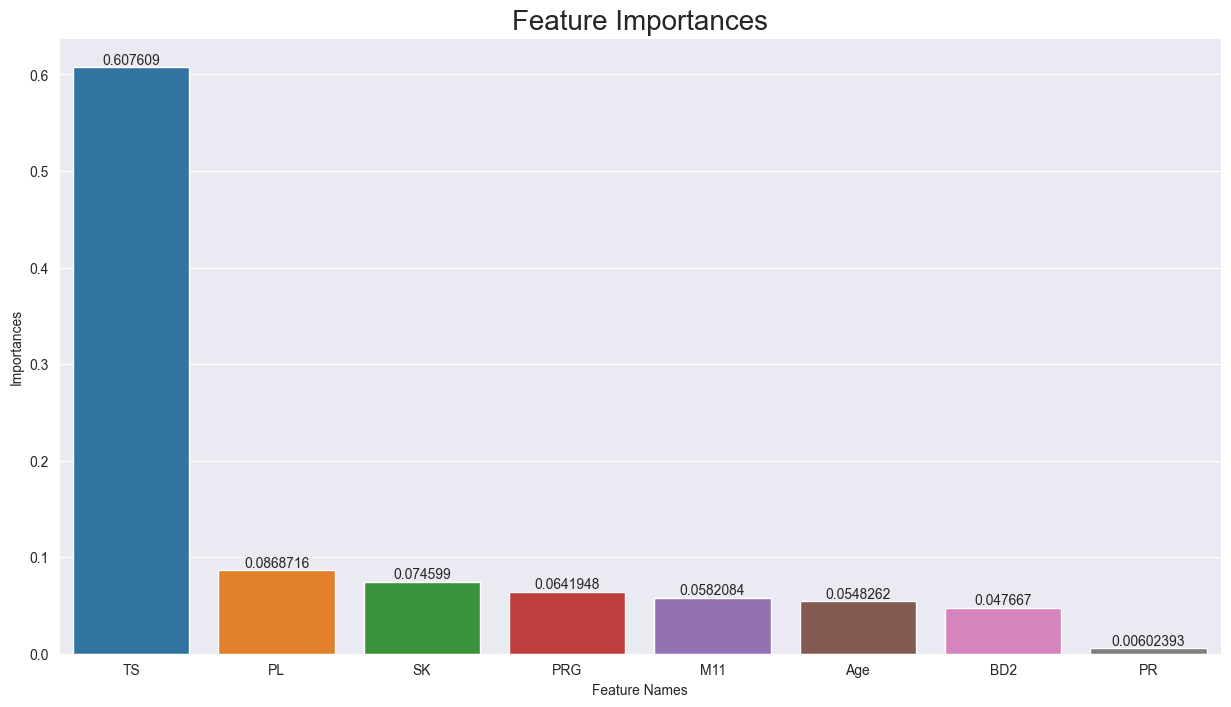

In [57]:
# Add figure size
plt.figure(figsize = (15,8))
# Create bar plot with colors
ax = sns.barplot(x="Feature Names", y="Importances", data=df_importances, hue="Feature Names", dodge=False)
# Add labels and title
plt.xlabel("Feature Names")
plt.ylabel("Importances")
# Add figure title anf fontsize
plt.title("Feature Importances", fontsize = 20)
# Label importance score on each bar
for bars in ax.containers:
    ax.bar_label(bars)
# Show plot
plt.show()

# ROC Curve

**What is ROC Curve?**

**AUC - ROC** curve is a performance measurement for the classification problems at various threshold settings. **ROC** is a probability curve and **AUC** represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the **AUC**, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the **AUC**, the better the model is at distinguishing between patients with the disease and no disease.

**credit**: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

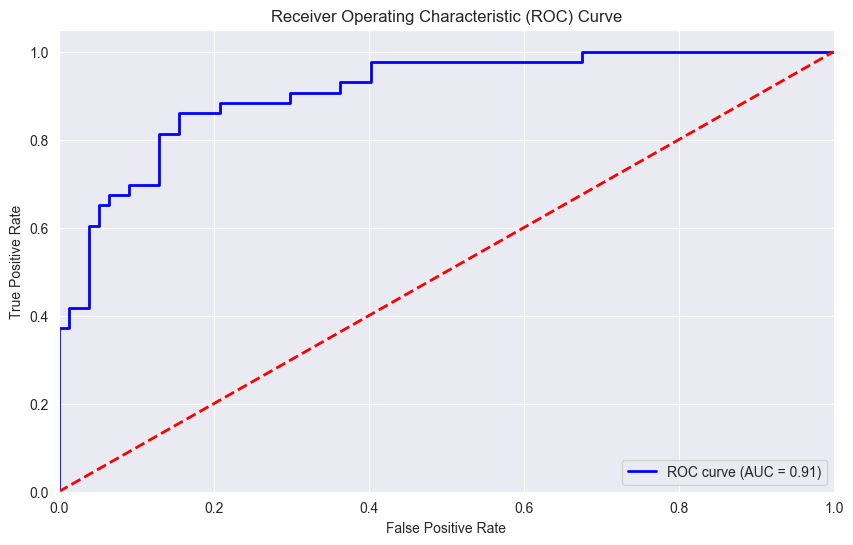

In [58]:
# Use the fitted model to predict probabilities on the test set
probabilities = GB_tuned.predict_proba(x_test_scaled)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, probabilities)

# Plot ROC curve with the following parameters:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
# show the plot
plt.show()

# Confusion Matrix

Confusion matrix

 [[67 10]
 [13 30]]

True Positives(TP) =  67

True Negatives(TN) =  30

False Positives(FP) =  10

False Negatives(FN) =  13


              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85        80
         1.0       0.70      0.75      0.72        40

    accuracy                           0.81       120
   macro avg       0.78      0.79      0.79       120
weighted avg       0.81      0.81      0.81       120



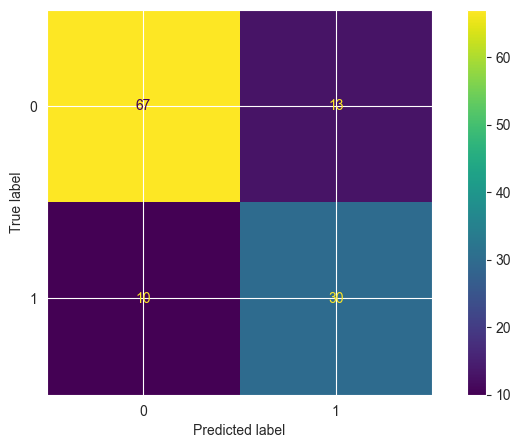

In [59]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred_GB)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
print('\n')
# Print the classification report
print(classification_report(y_pred_GB, y_test))

# plot and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_pred_GB, y_test))
disp = disp.plot()

**Model's true predicts**

* **True positive** is 67, It means our model predict 1 and the true label was 1. Model successfully predict 98 diabetics.
* **True negative** is 13. It means our model predict 0 and the true label was 0. Model successfully predict 18 non-diabetics.

**Model's false predicts**

* **False positive** is 10. It means our model predict 1 and the true label was 0. So the patient wasn't diabetic but model said "he/she is diabetic."
* **False negative** is 30. It means our model predict 0 and the true label was 1. So the patient was diabetic but model said "he/she is not diabetic."

## Building prediction for submission

In [60]:
df_unknown = pd.read_csv('Paitients_Files_Test.csv')
df_unknown.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [63]:
X_unknown = df_unknown.drop('ID','Insurance', axis='columns')

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [62]:
X_unknown_scaled = scaler.transform(X_unknown)

ValueError: X has 9 features, but StandardScaler is expecting 8 features as input.

In [ ]:
y_unknown = final_model.predict(X_unknown_scaled)

In [ ]:
df_unknown['predicted_sepsis'] = y_unknown
df_unknown.head()

In [ ]:
#df_unknown.to_csv('prediction.csv', index=False)

## Appendix

ID: number to represent patient ID

PRG: Plasma glucose

PL: Blood Work Result-1 (mu U/ml)

PR: Blood Pressure (mm Hg)

SK: Blood Work Result-2 (mm)

TS: Blood Work Result-3 (mu U/ml)

M11: Body mass index (weight in kg/(height in m)^2

BD2: Blood Work Result-4 (mu U/ml)

Age: patients age (years)



## Reference

The Johns Hopkins University Johns Hopkins Road Laurel, MD 20707 (301) 953-6231
